## <b>Описание проекта</b>

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.  
Нам необходимо выявить, определяющие успешность игры, закономерности. Эти данные позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В нашем распоряжении данные из открытых источников, из которых доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.  
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Опишем значения столбцов в данных для удобства:  
    
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы долларов)  
EU_sales — продажи в Европе (миллионы долларов)  
JP_sales — продажи в Японии (миллионы долларов)  
Other_sales — продажи в других странах (миллионы долларов)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Изучение файла с данными 

In [366]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [367]:
# Читаем данные из csv-файла в датафрейм и сохраним в переменную data
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [368]:
# Изучим общую информацию о полученном датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [369]:
# Выведем первые 10 строк датафрейма
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [370]:
# Проверим явные дупликаты
data.duplicated().sum()

0

В таблице 11 столбцов и 16715 строк. В некоторых столбцах есть пропущенные значения и некорректный тип данных. Явные дупликаты отсутствуют.

### Предобработка данных

#### Работа с названиями столбцов

Приведем названия столбцов к нижнему регистру.

In [371]:
data.columns = data.columns.str.lower()

Проверим изменения

In [372]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Приведем данные в столбцах 'name', 'platform', 'genre' также к нижнему регистру.

In [373]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()

In [374]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Работа с пропущенными значениями в столбцах

In [375]:
# Выведем количество пропущенных значений для каждого столбца
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбцах 'name' и 'genre' всего по 2 пропущенных значения. Заполнить их мы не можем, поэтому их можно удалить. Пропуски в данных столбцах могли возникнуть из-за того, что при заполнении данных об игре забыли указать название, а также жанр, или у игры отсутствует название.

In [376]:
data.dropna(subset=['name'], inplace=True)
data.dropna(subset=['genre'], inplace=True)

В столбце 'year_of_release' заполнить дату выпуска игры мы не можем. Пропуски можно удалить.  
Пропуски в данном столбце могли возникнуть из-за того, что при заполнении данных об игре забыли указать дату или точная дата выхода игры не известна.

In [377]:
data.dropna(subset=['year_of_release'], inplace=True)

В столбцах 'critic_score' и 'user_score' пропущенных значений много. К сожалению, заполнить мы их не можем, так как данные могут сильно исказиться. Данные могли быть пропущены при составлении таблицы, т.к. оценка игры была необязательной или в силу технических проблем. Причиной отсутствия рейтинга может быть просто отсутствие оценок рейтинга ESRB или при заполнении данных об игре забыли указать рейтинг. 

В столбце 'rating' заменим пропущенные значения на 'empty', т.о. мы выделим видеоигры без возрастного рейтинга ESRB. 

In [378]:
data['rating'] = data['rating'].fillna('empty')

In [379]:
# Проверим изменения
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

#### Работа с уникальными значениями в столбце 'user_score' 

Изучим уникальные значения в столбце 'user_score'

In [380]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

По результам яндекс-поиска значение 'tbd' - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Заменим  данное значение на 'nan'.

In [381]:
# Заменим tbd на Nan
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

In [382]:
# Проверим изменения
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

#### Работа с типами данных

Найдём столбцы, в которых нужно изменить тип данных.   

In [383]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Столбец с годами выпуска 'year_of_release' должен иметь целые значения, а не дробные. Данному столбцу можно присвоить тип данных int. В столбце 'user_score' c оценками пользователей данные хранятся как object, а не числовые значения. Надо заменить на тип float. 

In [384]:
# Приводим к целочисленному типу 'year_of_release'
data['year_of_release'] = data['year_of_release'].astype('int')

# Приводим к числовому типу 'user_score'
data['user_score'] = data['user_score'].astype('float')

In [385]:
# Приведем столбцы с типом 'float64' к типу данных 'float32'
float64_cols = list(data.select_dtypes(include='float64'))

data[float64_cols] = data[float64_cols].astype('float32')

In [386]:
# Проверим изменения
data.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float32
eu_sales           float32
jp_sales           float32
other_sales        float32
critic_score       float32
user_score         float32
rating              object
dtype: object

#### Добавим столбец 'total_sales'  

Посчитаем общую сумму продаж во всех регионах и добавим в отдельный столбец 'total_sales'

In [387]:
data.insert(8, 'total_sales', data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1))

In [388]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.360001,28.959999,3.77,8.45,82.539993,76.0,8.0,E
1,super mario bros.,nes,1985,platform,29.080000,3.580000,6.81,0.77,40.240002,NaN,NaN,empty
2,mario kart wii,wii,2008,racing,15.680000,12.760000,3.79,3.29,35.520000,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.610000,10.930000,3.28,2.95,32.770000,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.270000,8.890000,10.22,1.00,31.380001,NaN,NaN,empty


#### Проверка редких и выбивающихся значений по числовым столбцам таблицы

In [389]:
data.describe().round(2)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
count,16444.00,16444.00,16444.00,16444.00,16444.00,16444.00,7983.00,7463.00
mean,2006.49,0.26,0.15,0.08,0.05,0.54,68.99,7.13
std,5.88,0.82,0.51,0.31,0.19,1.56,13.92,1.50
min,1980.00,0.00,0.00,0.00,0.00,0.00,13.00,0.00
25%,2003.00,0.00,0.00,0.00,0.00,0.06,60.00,6.40
50%,2007.00,0.08,0.02,0.00,0.01,0.17,71.00,7.50
75%,2010.00,0.24,0.11,0.04,0.03,0.47,79.00,8.20
max,2016.00,41.36,28.96,10.22,10.57,82.54,98.00,9.70


Все данные выглядят корректно.

### Исследовательский анализ данных

#### Изучим сколько игр выпускалось в разные годы

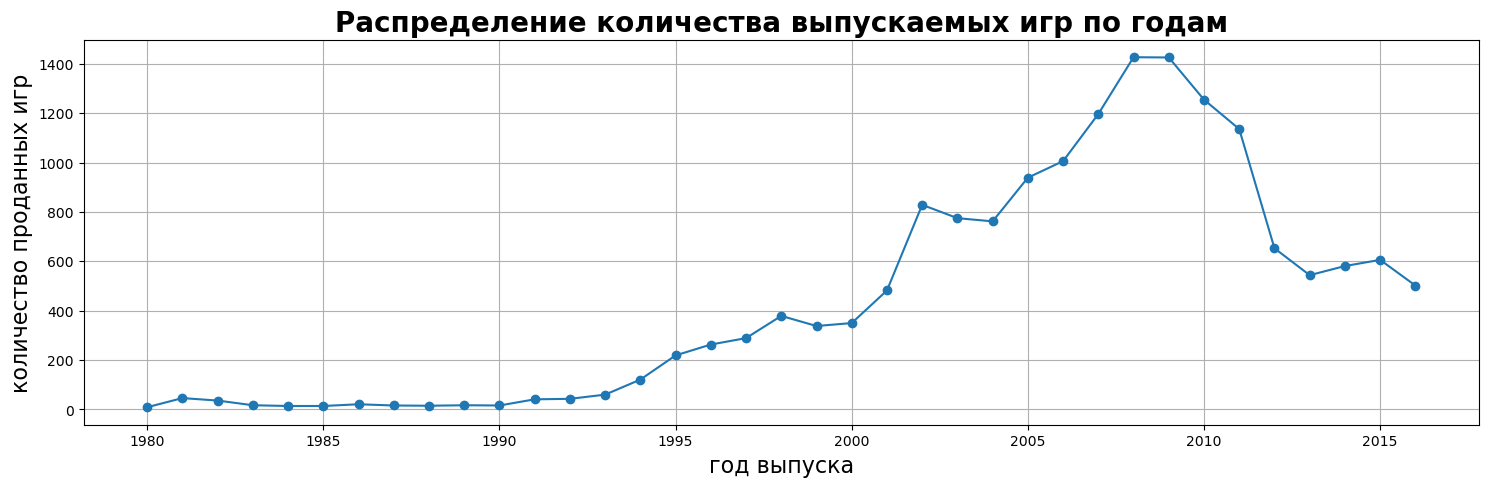

In [390]:
# Построим график распределения количества выпускаемых игр по годам 
data.groupby(['year_of_release'])['name'].count()\
.plot(kind='line', style='o-', grid=True, figsize=(18, 5))
plt.title('Распределение количества выпускаемых игр по годам', fontsize=20, fontweight='bold')
plt.xlabel('год выпуска', fontsize=16)
plt.ylabel('количество проданных игр', fontsize=16);

По графику видно, до 1990 года выпускалось приблизительно одинаковое количество игр в год. Небольшой рост количества выпускаемых компьютерных игр начался после 1990 года и продолжался до 1993 года. С 1993 мы наблюдаем резкий скачок в продажах, который продолжался до 2008 года. Этот рост связан с развитием игровой индустрии и ростом Интернета и мобильной связи. В 2008-2009 годах количество выпускаемых игр идет держится на одном уровне и после 2009 года идет резкий спад до 2013 года. Такое падение связывают с началом мирового финансового кризиса в 2008 году. С 2013 года идет небольшой прирост продаж, но после 2015 года опять наблюдаем спад. 

#### Изучим как менялись продажи по платформам в разные годы

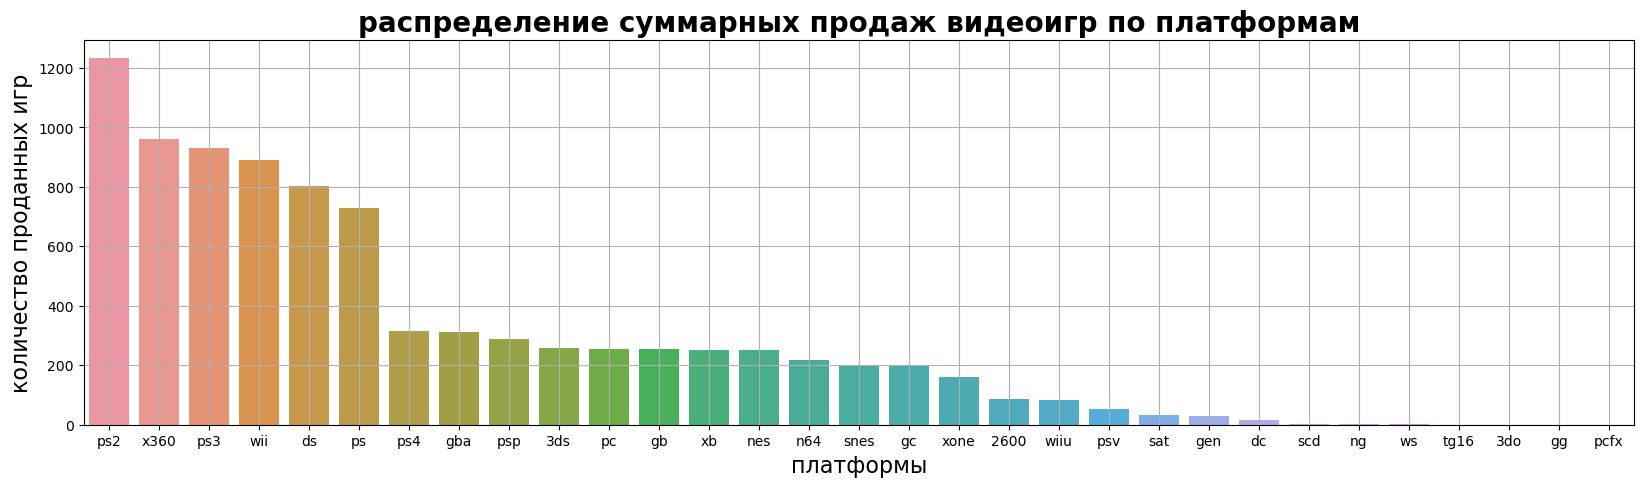

In [391]:
# Сгруппируем суммарные продажи видеоигр по платформам 
total_sales_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)
 
# Построим график распределения суммарных продаж видеоигр по платформам   
plt.figure(figsize=(20, 5))
plt.title('распределение суммарных продаж видеоигр по платформам', fontsize=20, fontweight='bold')
sns.barplot(x=total_sales_platform.index, y=total_sales_platform['total_sales'])
plt.ylabel('количество проданных игр', fontsize=16)
plt.xlabel('платформы', fontsize=16)
plt.grid(True);


С наибольшим отрывом от остальных лидирующие позиции занимают 6 платформ: ps2, x360, ps3, wii, ds и ps. 


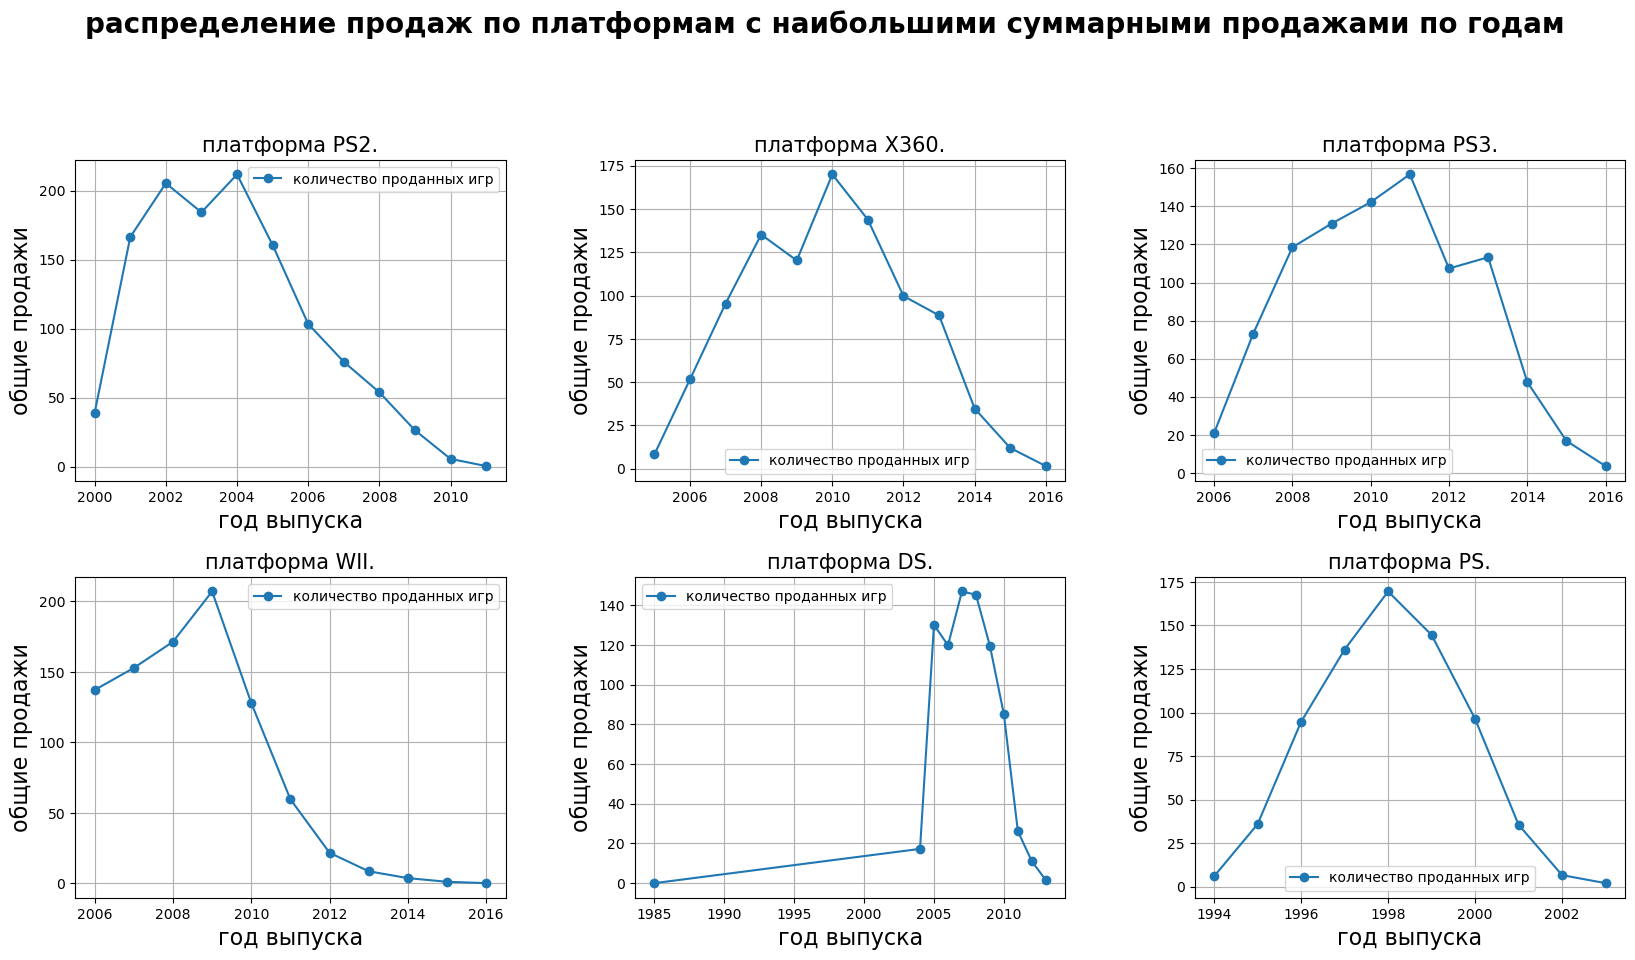

In [392]:
plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('распределение продаж по платформам с наибольшими суммарными продажами по годам', fontsize=20, fontweight='bold')

# Сгруппируем суммарные продажи видеоигр по 6 самым продаваемым платформам 
top_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False).reset_index()['platform'].head(6)
position = 0

# Напишем цикл для построения графиков
for platform in top_platform:
    position += 1
    platform6 = data.query('platform == @platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    plt.subplot(3, 3, position)
    plt.title(f'платформа {platform.upper()}.', fontsize=15)
    plt.plot(platform6, 'o-', label='количество проданных игр')
    plt.ylabel('общие продажи', fontsize=16)
    plt.xlabel('год выпуска', fontsize=16)
    plt.grid(True)
    plt.legend()
plt.show();

По графикам видно, что платформа "живет" около 11 лет. Пик продаж наступает примерно через 4-5 лет после выхода приставки.

Актуальный период для прогноза на 2017 возьмем с 2014 по 2016 года. Данный период выбран в связи с тем, чтобы мы могли посмотреть какие платформы в принципе не будут продаваться. Если сделать период меньше, то данные могут исказить анализ. 

#### Изучим потенциально прибыльные платформы

Рассмотрим какие платформы лидируют по продажам в выбранном нами периоде

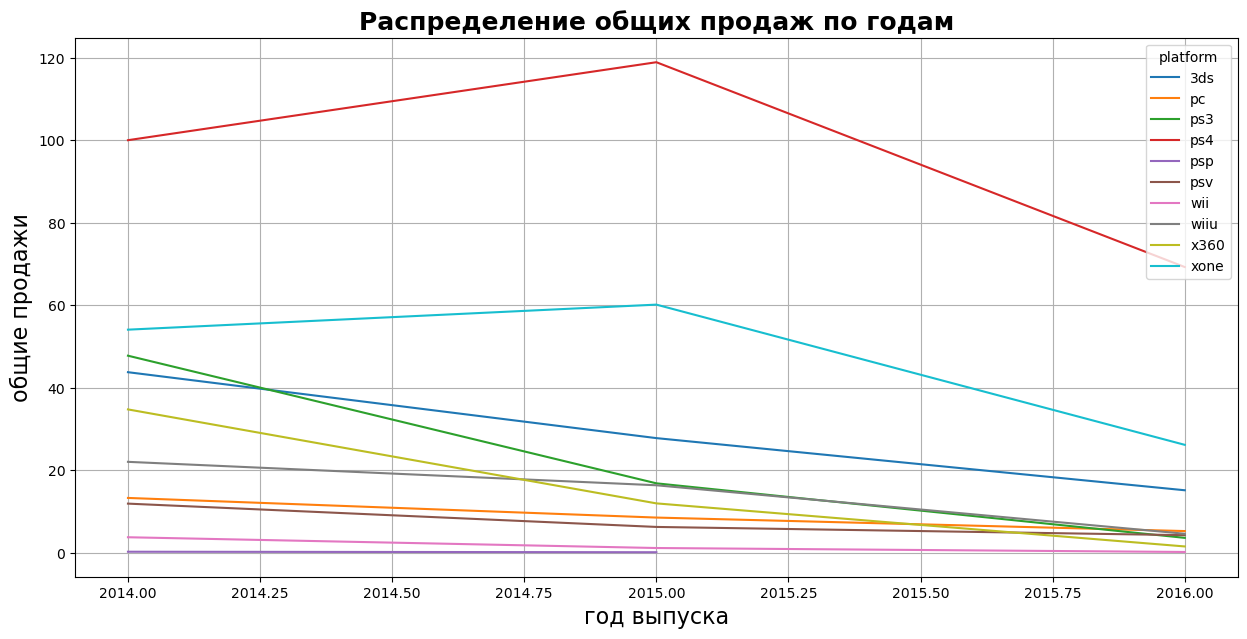

In [393]:
# Отсортируем датафрей по выбранному нами периоду и сохраним в переменную new_data
new_data = data.query('year_of_release >= 2014')

# Построим график распределения продаж по годам
new_data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')\
.plot(grid=True, figsize=(15, 7))
plt.title('Распределение общих продаж по годам', fontsize=18, fontweight='bold')
plt.ylabel('общие продажи', fontsize=16)
plt.xlabel('год выпуска', fontsize=16);

На графике мы видим,  что в выборке только две платформы, по которым показатели значительно выше. Это платформы xone, ps4. Продажи по ним в течении 2014 года увеличивались, но с 2015 году стали уменьшаться. Данные платформы можно назвать потенциально прибыльными. Также можно выделить платформу 3ds, ps3, x360 и wiiu, продажи в 2014-2015 годах по ним были средними, хотя было стабильное понижение продаж. 

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

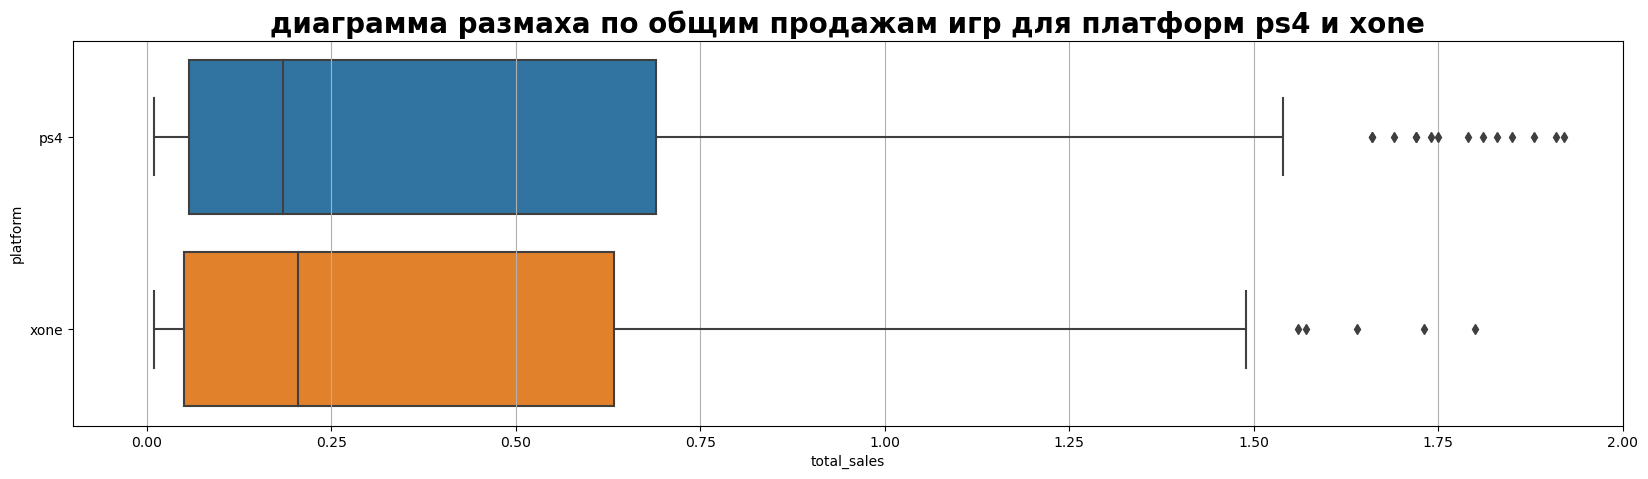

In [394]:
# Построим диаграмму размаха по общим продажам игр для платформ ps4 и xone
plt.figure(figsize=(20, 5))
plt.title('диаграмма размаха по общим продажам игр для платформ ps4 и xone', fontsize=20, fontweight='bold')
plt.xlim(-0.1, 2)
plt.grid(True)
profit_platform = ['ps4', 'xone']
sns.boxplot(x='total_sales', y='platform', data=new_data[new_data['platform'].isin(profit_platform)], orient='h');

По графику можно сказать, что большего всего продавались игры для ps4.

#### Изучим как влияют на продажи отзывы пользователей и критиков внутри платформы PS4 

Коэффициент корреляции для отзывов пользователей -0.04
Коэффициент корреляции для отзывов критиков 0.4


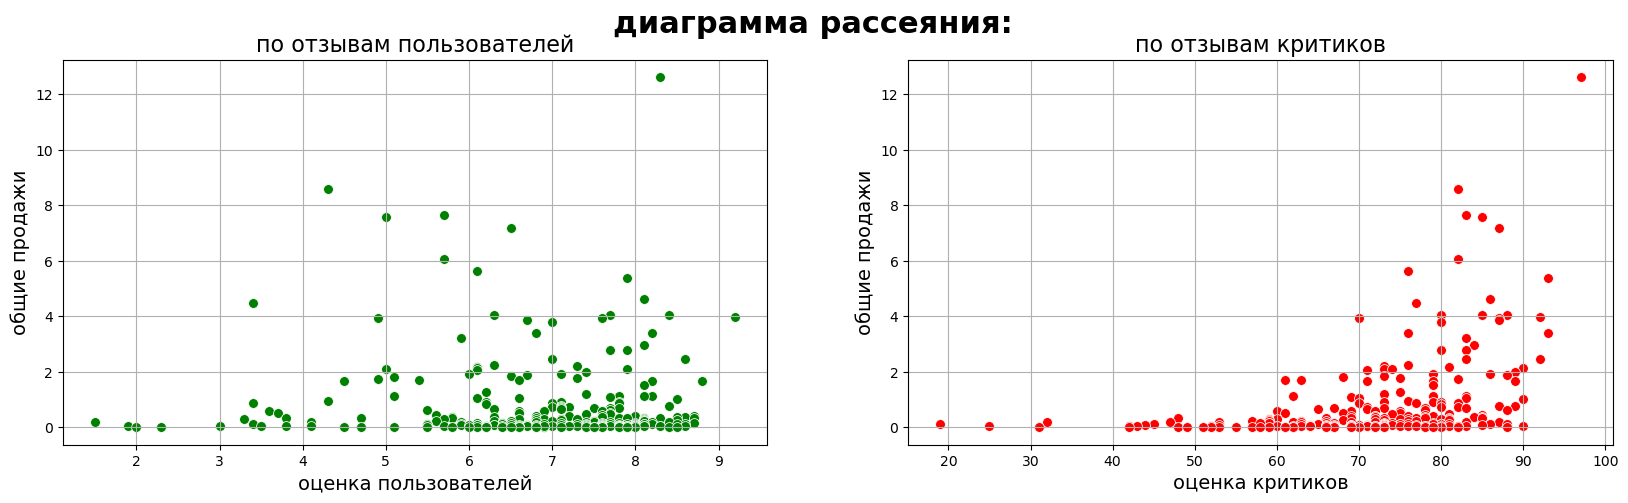

In [395]:
plt.figure(figsize=(20, 5))
plt.suptitle('диаграмма рассеяния:', fontsize=22, fontweight='bold')

# Построим диаграмму по отзывам пользователей
plt.subplot(1, 2, 1)
plt.title('по отзывам пользователей', fontsize=16)
sns.scatterplot(x='user_score', y='total_sales', color = 'green', data=new_data[new_data['platform'] == 'ps4'], s=50)
plt.ylabel('общие продажи', fontsize=14)
plt.xlabel('оценка пользователей', fontsize=14)
plt.grid(True)

# Построим диаграмму по отзывам критиков
plt.subplot(1, 2, 2)
plt.title('по отзывам критиков', fontsize=16)
sns.scatterplot(x='critic_score', y='total_sales',color = 'red', data=new_data[new_data['platform'] == 'ps4'], s=50)
plt.ylabel('общие продажи', fontsize=14)
plt.xlabel('оценка критиков', fontsize=14)
plt.grid(True);

# Посчитаем коэффициенты коррелляции
print('Коэффициент корреляции для отзывов пользователей'\
      , round(new_data[new_data['platform'] == 'ps4']['user_score']\
      .corr(new_data[new_data['platform'] == 'ps4']['total_sales']),2))
print('Коэффициент корреляции для отзывов критиков'\
      , round(new_data[new_data['platform'] == 'ps4']['critic_score']\
      .corr(new_data[new_data['platform'] == 'ps4']['total_sales']),2))

По графикам видно, что продаж больше у игр с более высокими оценками. Отзывы критиков влияют на общие продажи больше, чем отзывы пользователей.  
При этом коэффициент корреляции для отзывов критиков показывает не сильное влияние на продажи видеоигр в целом.

#### Изучим как влияют на продажи отзывы пользователей и критиков игр на других платформах

Построим диаграммы рассеяния и посчитаем коэффициент корреляции для платформ xone, 3ds, ps3, x360 и wiiu.

In [396]:
# Создадим список других платформ
top_platforms = ['xone', '3ds', 'ps3', 'x360', 'wiiu']

# Напишем функцию для построения графиков рассеяния и подсчета корреляции
def other_platforms(top_platforms):
    platform = new_data[new_data['platform']==top_platforms]
    fig, ax = plt.subplots(1 ,2, figsize=(14,3))
    sns.scatterplot(x='user_score', y='total_sales', color = 'green', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', color = 'red', data=platform, ax=ax[1])
    fig.suptitle(top_platforms, fontsize=15, fontweight='bold')
    ax[0].set(xlabel='оценка пользователей')
    ax[1].set(xlabel='оценка критиков')
    ax[0].set(ylabel='общие продажи')
    ax[1].set(ylabel='общие продажи')
    plt.show()
    
    user_corr = platform['user_score'].corr(platform['total_sales'])
    critic_corr = platform['critic_score'].corr(platform['total_sales'])
    print('Коэффициент корреляции для отзывов пользователей', round(user_corr, 2))
    print('Коэффициент корреляции для отзывов критиков', round(critic_corr,2))
    
    

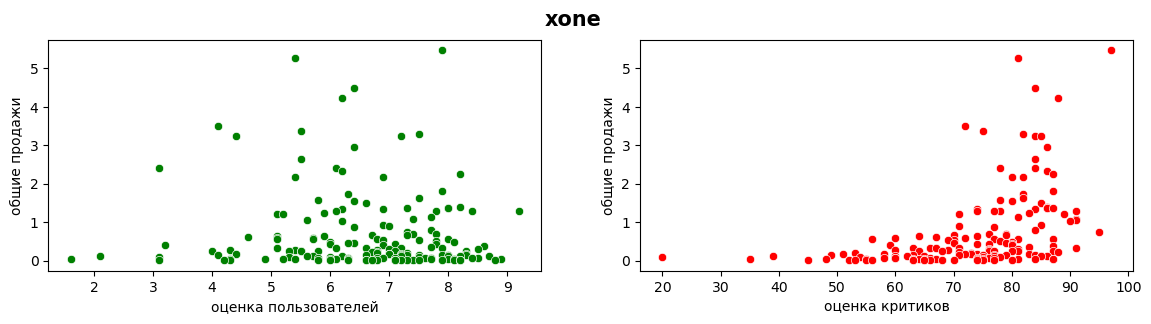

Коэффициент корреляции для отзывов пользователей -0.07
Коэффициент корреляции для отзывов критиков 0.43


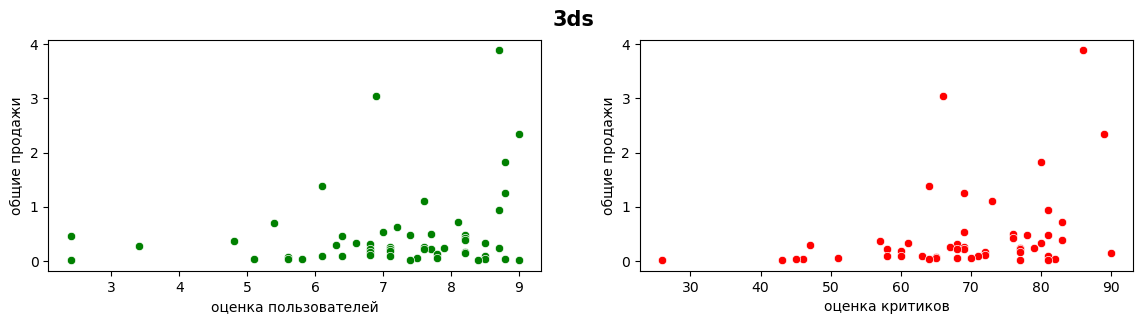

Коэффициент корреляции для отзывов пользователей 0.22
Коэффициент корреляции для отзывов критиков 0.31


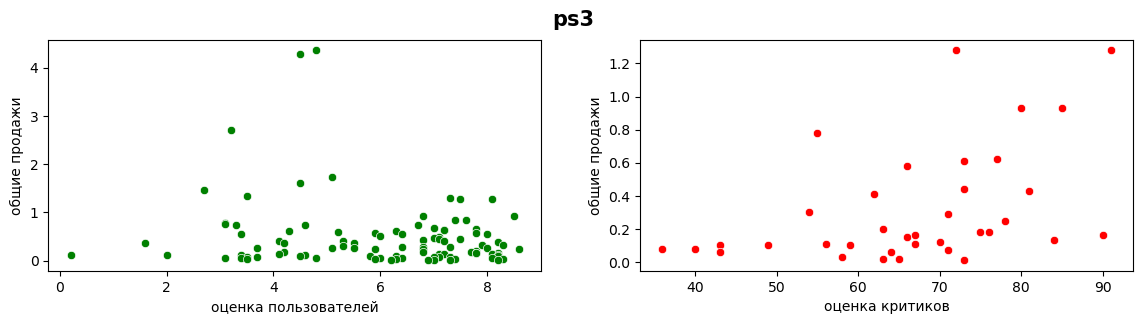

Коэффициент корреляции для отзывов пользователей -0.17
Коэффициент корреляции для отзывов критиков 0.45


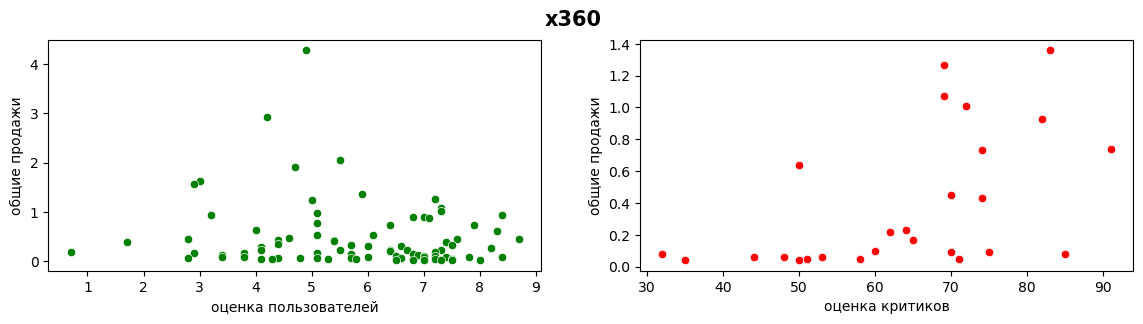

Коэффициент корреляции для отзывов пользователей -0.14
Коэффициент корреляции для отзывов критиков 0.53


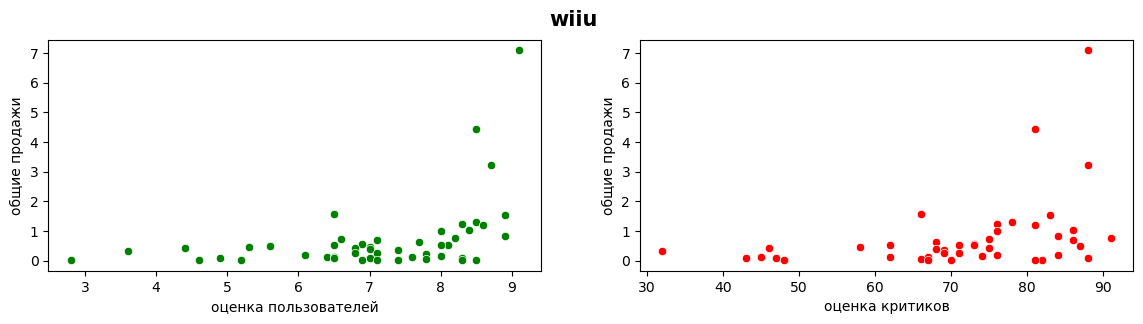

Коэффициент корреляции для отзывов пользователей 0.41
Коэффициент корреляции для отзывов критиков 0.37


In [397]:
# Построим диаграммы рассеяния и посчитаем коэффициент корреляции для других платформ
for platform in top_platforms:
    other_platforms(platform)
    

По графикам можно сказать, что у платформ ps3, x360 и wiiu больше продаж видеоигр с оценками критиков. На платформе xone и 3ds  прослеживается приблизительно одинаковое влияние отзывов критиков и пользователей на продажи видеоигр.  
В целом по всем платформам, влияние мнения критиков, хоть и не имеет высоких показателей, но значительно выше влияния пользователских оценок. Можно предположить, что данное являение может иметь определенный успех в будущем для продаж.
 

#### Изучим общее распределение игр по жанрам

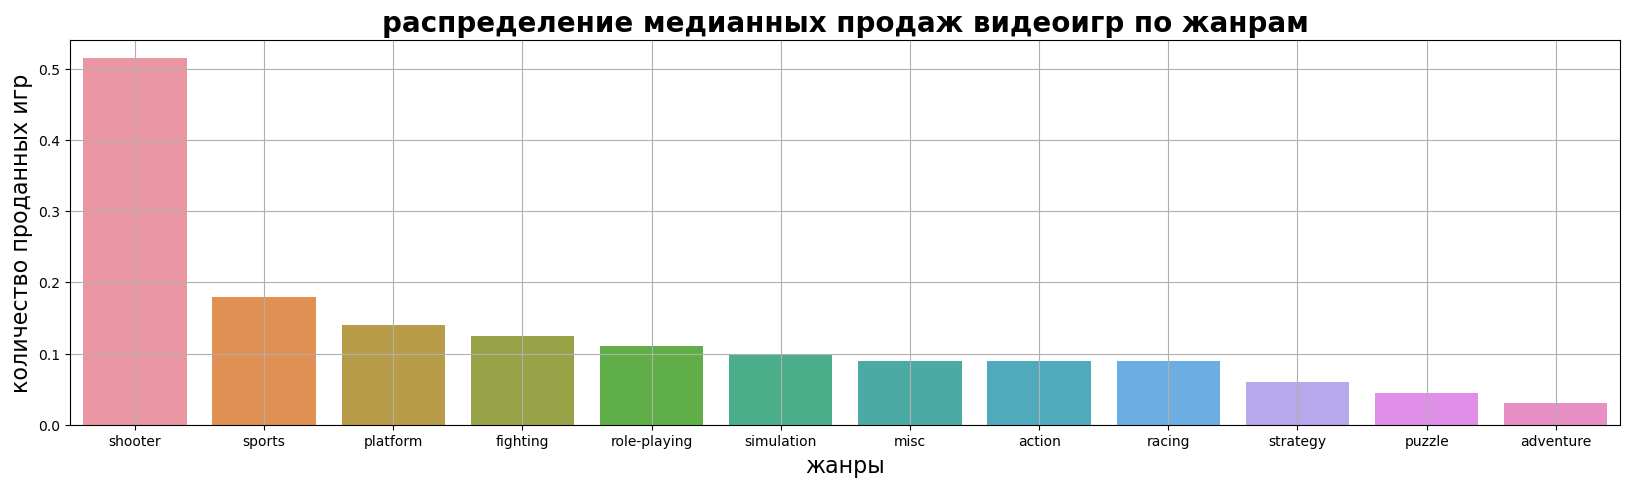

In [398]:
# Сгруппируем медианные продажи видеоигр по жанрам 
total_sales_genre = new_data.pivot_table(index='genre', values='total_sales', aggfunc='median')\
.sort_values(by='total_sales', ascending=False)
 
# Построим график продаж видеоигр по жанрам    
plt.figure(figsize=(20, 5))
plt.title('распределение медианных продаж видеоигр по жанрам', fontsize=20, fontweight='bold')
sns.barplot(x=total_sales_genre.index, y=total_sales_genre['total_sales'])
plt.ylabel('количество проданных игр', fontsize=16)
plt.xlabel('жанры', fontsize=16)
plt.grid(True);

Больше всего продаж у shooter, это самый популярный жанр. Жанры sports и platform имели практически одинаковые доли продаж и занимали третье место. Как видно по графику, adventure наименее продаваемый жанр видеоигр.

### Составим портрет пользователя каждого региона

    Для пользователя каждого региона (NA, EU, JP):
    - Определим самые популярные платформы (топ-5)
    - Определим самые популярные жанры (топ-5)
    - Изучим влияет ли рейтинг ESRB на продажи в отдельном регионе

*  Определим самые популярные платформы (топ-5)

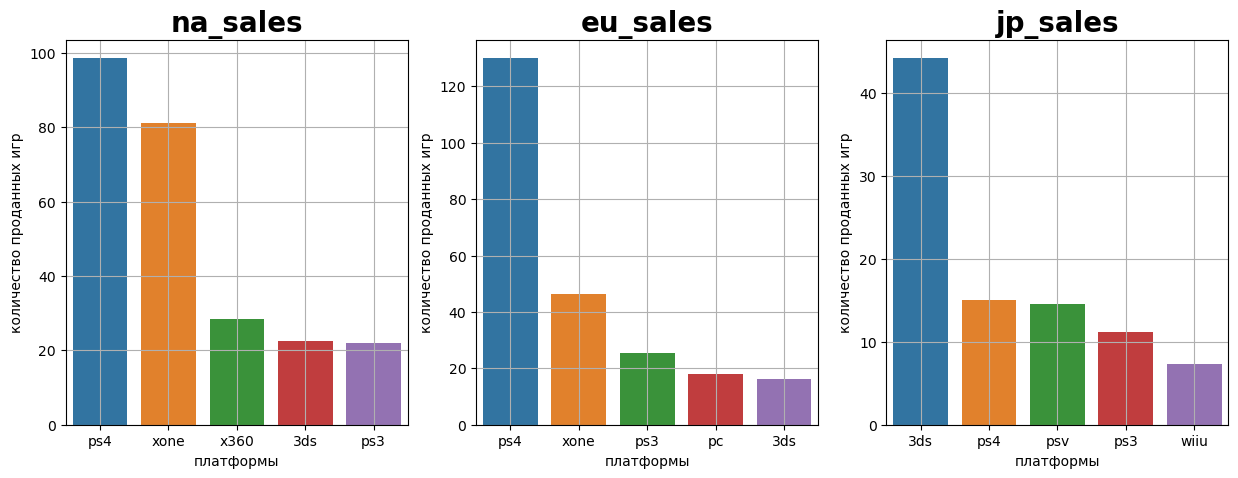

In [399]:
# Создадим список с продажами для каждого региона
region_sales = ['na_sales', 'eu_sales', 'jp_sales']
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Напишем цикл для построения графиков по платформам 
for num, ex in enumerate(region_sales):
    region_sales_platform = new_data.pivot_table(index='platform', values=ex, aggfunc='sum')\
    .sort_values(by=ex, ascending=False).head()
    sns.barplot(x=region_sales_platform.index, y=region_sales_platform[ex], ax = ax[num])
    ax[num].set_title(ex, fontsize=20, fontweight='bold') 
    ax[num].set(xlabel='платформы', ylabel='количество проданных игр')
    ax[num].grid(True);        

Для Северной Америки самыми популярными платформами являются: ps4, xone, x360, 3ds, ps3. При это лидируют с существенным отрывом ps4, xone.  
Для Европы самыми популярными платформами являются: ps4, xone, ps3, pc, 3ds. При это лидирует с существенным отрывом ps4.  
Для Японии самыми популярными платформами являются: 3ds, ps4, psv, ps3, wiiu. При это лидирует с существенным отрывом 3ds.

*  Определим самые популярные жанры (топ-5)

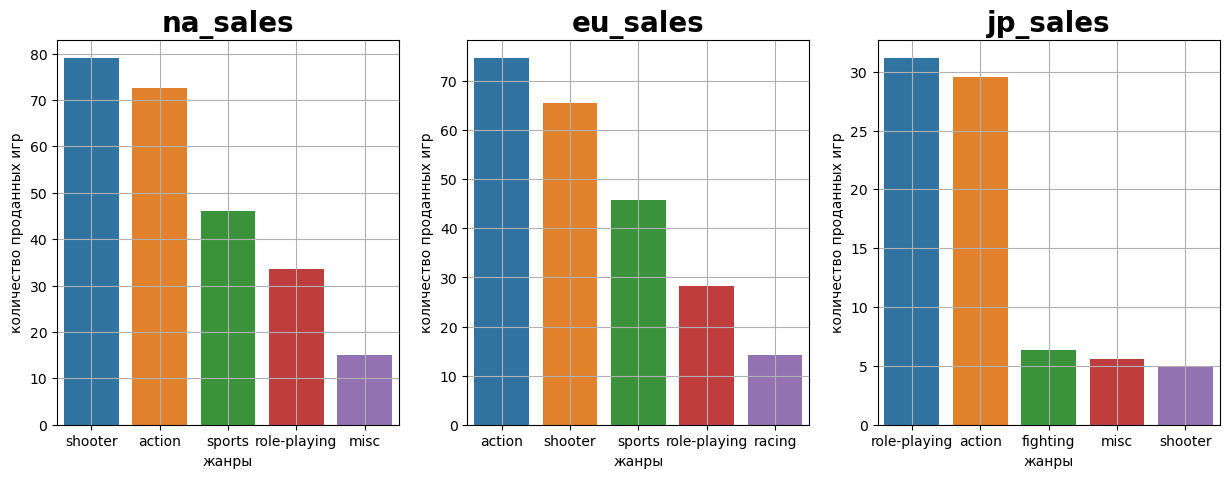

In [400]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Напишем цикл для построения графиков по платформам 
for num, ex in enumerate(region_sales):
    region_sales_platform = new_data.pivot_table(index='genre', values=ex, aggfunc='sum')\
    .sort_values(by=ex, ascending=False).head()
    sns.barplot(x=region_sales_platform.index, y=region_sales_platform[ex], ax = ax[num])
    ax[num].set_title(ex, fontsize=20, fontweight='bold') 
    ax[num].set(xlabel='жанры', ylabel='количество проданных игр')
    ax[num].grid(True);   

Для Северной Америки самыми популярными жанрами являются: shooter, action, sports, role-playing, misc.   
Для Европы самыми популярными жанрами являются: action, shooter, sports, role-playing, racing.  
Для Японии самыми популярными жанрами являются: role-playing, action, figting, misc, shooter. При это лидируют с существенным отрывом role-playing, action.

*  Изучим влияет ли рейтинг ESRB на продажи в отдельном регионе

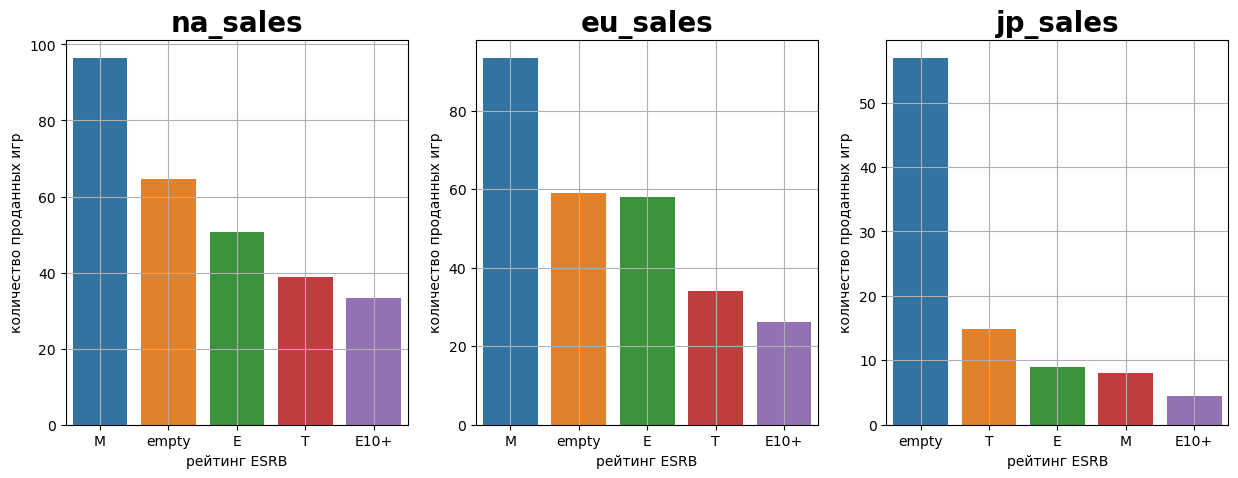

In [401]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Напишем цикл для построения графиков по платформам 
for num, ex in enumerate(region_sales):
    region_sales_platform = new_data.pivot_table(index='rating', values=ex, aggfunc='sum')\
    .sort_values(by=ex, ascending=False)
    sns.barplot(x=region_sales_platform.index, y=region_sales_platform[ex], ax = ax[num])
    ax[num].set_title(ex, fontsize=20, fontweight='bold') 
    ax[num].set(xlabel='рейтинг ESRB', ylabel='количество проданных игр')
    ax[num].grid(True);   

Для Северной Америки и Европы одинаково в порядке убывания распределился рейтинг ESRB: M-старше 17 лет, empty- без возрастного рейтинга, E-для всех возрастных категорий, T-для лиц старше 13 лет, E10+-для лиц старше 10 лет. При этом лидирует с существенным отрывом рейтинг M.  
Для Японии рейтинг ESRB распределился: empty- без возрастного рейтинга ESRB, T-для лиц старше 13 лет, E-для всех возрастных категорий, M-старше 17 лет, E10+-для лиц старше 10 лет. Лидируют с существенным отрывом видеоигры без возрастного рейтинга.  
Такое распределение видеоигр без рейтинга связано с тем, что в разных странах представлены разные рейтинговые модели: американская ESRB, европейская PEGI, японская CERO.

### Проверим гипотезы

    Проверим следующие гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action и Sports разные.

*  Проверим певую гипотеу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверки данной гипотезы нам надо сформулировать:  
H₀ - нулевую гипотезу - "Средние пользовательские рейтинги платформ Xbox One и PC равны"  
H₁ - альтернативную гипотезу - "Средние пользовательские рейтинги платформ Xbox One и PC не равны"

In [402]:
# Сохраним в переменную выборку c оценками пользователей для платформы xone
xone_score = new_data[new_data['platform'] == 'xone']['user_score']

# Сохраним в переменную выборку c оценками пользователей для платформы pc
pc_score = new_data[new_data['platform'] == 'pc']['user_score']

In [403]:
print(len(xone_score))
print(len(pc_score))

228
151


У нас достаточно большие и неодинаковые по размеру выборки и можно предположить, что дисперсии у выборок разные. Для дальнейших расчетов мы будем использовали дополнительный параметр equal_var=False.

Нам требуется сравнить средние двух генеральных совокупностей между собой. В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var)

In [404]:
# Установим уровень статистической значимости
# если p-value окажется меньше него, отвергнем нулевую гипотезу 
alpha = 0.05 

# Проведём стат. тест для двух выборок
results = st.ttest_ind(xone_score.dropna(), pc_score.dropna(), equal_var=False)

# Выведем на экран получившееся p-значение
print('p-значение:', results.pvalue)

# Сравним p-значение с alpha
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.11601545900050317
Не получилось отвергнуть нулевую гипотезу


Итог проверки: средние пользовательские рейтинги платформ Xbox One и PC равны.

*  Проверим певую гипотеу, что средние пользовательские рейтинги жанров Action и Sports разные

Для проверки данной гипотезы нам надо сформулировать:  
H₀ - нулевую гипотезу - "Средние пользовательские рейтинги жанров Action и Sports равны"  
H₁ - альтернативную гипотезу - "Средние пользовательские рейтинги жанров Action и Sports не равны"

    

In [405]:
# Сохраним в переменную выборку c оценками пользователей для жанра action
action_score = new_data[new_data['genre'] == 'action']['user_score']

# Сохраним в переменную выборку c оценками пользователей для жанра sports
sports_score = new_data[new_data['genre'] == 'sports']['user_score']

In [406]:
print(len(action_score))
print(len(sports_score))

619
161


У нас достаточно большие и неодинаковые по размеру выборки и можно предположить, что дисперсии у выборок разные. Для дальнейших расчетов мы будем использовали дополнительный параметр equal_var=False.

Нам требуется сравнить средние двух генеральных совокупностей между собой. В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var)

In [407]:
# Установим уровень статистической значимости
# если p-value окажется меньше него, отвергнем нулевую гипотезу 
alpha = 0.05 

# Проведём стат. тест для двух выборок
results = st.ttest_ind(action_score.dropna(), sports_score.dropna(), equal_var=False)

# Выведем на экран получившееся p-значение
print('p-значение:', results.pvalue)

# Сравним p-значение с alpha
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.1825638224397033e-14
Отвергаем нулевую гипотезу


Итог проверки: средние пользовательские рейтинги жанров Action и Sports не равны.

### Общий вывод

Было проведено исследование, чтобы выявить определяющие успешность игры закономерности, а также определить потенциально популярный продукт и спланировать рекламные кампании.  
В нашем распоряжении данные из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах.  

В ходе работы была выполнена предобработка данных.  
Привели названия столбцов и их содержимое к нижнему регистру. Проведена оптимизация типов данных. Столбец с годами выпуска 'year_of_release' присвоили тип данных int. Тип данных в столбце 'user_score' c оценками пользователей заменили на тип float. Приведем столбцы с типом 'float64' к типу данных 'float32'.    
Заполнены пропуски данных там, где это было возможно. В столбцах 'name' и 'genre' пропуски были удалены. Пропуски в данных столбцах могли возникнуть из-за того, что при заполнении данных об игре забыли указать название, а также жанр, или у игры отсутствует название. В столбце 'year_of_release' дату выпуска игры мы не смогли. Пропуски удалили. Пропуски в данном столбце могли возникнуть из-за того, что при заполнении данных об игре забыли указать дату или точная дата выхода игры не известна. В столбцах 'critic_score' и 'user_score' пропущенных значений много. К сожалению, заполнить мы их не смогли, так как данные могли сильно исказиться. Здесь данные могли быть пропущены при составлении таблицы, т.к. оценка игры была необязательной или в силу технических проблем. В столбце 'rating' заменили пропущенные значения на 'empty', т.о. мы выделили видеоигры без рейтинга. Причиной отсутствия рейтинга может быть просто отсутствие оценок рейтинга ESRB или при заполнении данных об игре забыли указать рейтинг.  
В столбце 'user_score' значение 'tbd' заменили на 'nan'.  
Посчитали общую сумму продаж во всех регионах и добавили в отдельный столбец 'total_sales'.  
  
Провели исследовательский анализ данных.  
Изучили сколько игр выпускалось в разные годы, для этого построили график распределения количества выпускаемых игр по годам. До 1990 года выпускалось приблизительно одинаковое количество игр в год. Небольшой рост количества выпускаемых компьютерных игр начался после 1990 года и продолжался до 1993 года. С 1993 мы наблюдали резкий скачок в продажах, который продолжался до 2008 года. Этот рост связан с развитием игровой индустрии и ростом Интернета и мобильной связи. В 2008-2009 годах количество выпускаемых игр держится на одном уровне и после 2009 года идет резкий спад до 2013 года. Такое падение связывают с началом мирового финансового кризиса в 2008 году. С 2013 года идет небольшой прирост продаж, но после 2015 года опять наблюдаем спад.  
Изучили как менялись продажи по платформам в разные годы, для этого построили график распределения суммарных продаж видеоигр по платформам. С наибольшим отрывом от остальных лидирующие позиции занимают 6 платформ: ps2, x360, ps3, wii, ds и ps. Далее построили графики распределения продаж по данным платформам по годам. Большинство платформ к 2016 году либо перестали выпускать игры, либо тенденция по выпуску игр пошла на спад. По графикам видно, что платформа "живет" около 11 лет. Пик продаж наступает примерно через 4-5 лет после выхода приставки.  
Актуальный период для прогноза на 2017 выбрали с 2014 по 2016 года. Данный период выбран в связи с тем, чтобы мы могли посмотреть какие платформы в принципе не будут продаваться. Если сделать период меньше, то данные могут исказить анализ.  
Изучим потенциально прибыльные платформы в выбранном периоде. Для этого построили график распределения общих продаж. На графике видно, что в выборке лидируют только две платформы, по ним показатели значительно выше. Это платформы xone, ps4. Продажи по ним в течении 2014 года увеличивались, но с 2015 году стали уменьшаться. Данные платформы можно назвать потенциально прибыльными. Также можно выделить платформу 3ds, ps3, x360 и wiiu, продажи в 2014-2016 годах по ним средние. Можно выделить общую тенденцию понижения продаж для всех платформ.  
Изучили как влияют на продажи отзывы пользователей и критиков. В целом по всем платформам, влияние мнения критиков, хоть и не имеет высоких показателей, но значительно выше влияния пользователских оценок. Можно предположить, что данное являение может иметь определенный успех в будущем для продаж, а также поможет спланировать рекламные акции.  
Изучили общее распределение игр по жанрам, для этого построили график распределения медианных продаж видеоигр по жанрам. Больше всего продаж у shooter, это самый популярный жанр. Жанры sports и platform имели практически одинаковые доли продаж и занимали третье место. Как видно по графику, adventure наименее продаваемый жанр видеоигр.  

Составили портрет пользователя для 3 регионов: Северная Америка, Европа и Япония, для этого определили топ-5 продаваемых платорм, топ-5 продаваемых жанров и изучили влияние рейтинга ESRB для каждого региона. Это помогло нам определить потенциально популярные платформы и потенциально популярные жанры и рейтинг для игр, что в дальнейшем поможет спланировать рекламные кампании и увеличить продажи магазина.   
Для Северной Америки самыми популярными платформами являются: ps4, xone, самыми популярными жанрами являются: shooter, action, sports, самые востребованные игры с рейтингом ESRB M-старше 17 лет.  
Для Европы самыми популярными платформами являются: ps4 - очень высокие продажи, xone, самыми популярными жанрами являются: action, shooter, sports, самые востребованные игры с рейтингом ESRB M-старше 17 лет.  
Для Японии самыми популярными платформами являются: 3ds - очень высокие продажи, ps4, самыми популярными жанрами являются: role-playing, action, лидируют с существенным отрывом видеоигры без возрастного рейтинга ESRB. Такое распределение видеоигр без рейтинга связано с тем, что в разных странах представлены разные рейтинговые модели: американская ESRB, европейская PEGI, японская CERO.    

Мы проверили следующие гипотезы:  
-Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
Итог проверки: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
-Средние пользовательские рейтинги жанров Action и Sports не равны  
Итог проверки: средние пользовательские рейтинги жанров Action и Sports не равны.







 







